#Women Cloth Reviews Prediction with Multi-Nomial Naive Bayes

#Objective
The objective of the Women Cloth Reviews Prediction project is to analyze customer reviews of women's clothing to extract valuable insights regarding sentiment and product performance. By employing text preprocessing techniques, such as tokenization and n-grams, the project will convert raw reviews into numerical features suitable for machine learning models. The Multinomial Naive Bayes algorithm will be selected for this task due to its effectiveness in handling text classification problems. The model will be trained on a labeled dataset of reviews, with a focus on ensuring robust validation through methods like train-test splits. Performance metrics, including accuracy, precision, recall, and F1-score, will be utilized to evaluate the model's predictive capabilities. Ultimately, the project aims to provide accurate predictions of sentiment in new reviews, offering retailers critical insights to enhance product offerings and improve customer satisfaction.

#Data Source

The dataset consists of 23,486 entries related to women’s clothing reviews, structured across 10 columns that capture various attributes of each review. The key columns include Clothing ID, which uniquely identifies each product, and Age, representing the age of the reviewer. The Title and Review columns contain textual feedback from customers, though they have some missing values, indicating that not all reviews have a title or a complete text.

The Rating column reflects the customers' satisfaction on a scale, while the Recommended column indicates whether the reviewer would recommend the product. Additional columns include Positive Feedback, which quantifies positive responses, and categorical features like Division, Department, and Category, which help classify the clothing items further. Overall, this dataset provides a comprehensive overview of customer sentiment and product performance, enabling in-depth analysis and insights into women's clothing preferences. The presence of missing values in some columns suggests opportunities for data cleaning and preprocessing before analysis.

#Import Library

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback,Division,Department,Category
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


#Import Data

In [148]:
df = pd.read_csv('https://raw.githubusercontent.com/YBIFoundation/ProjectHub-MachineLearning/main/Women%20Clothing%20E-Commerce%20Review.csv')
df.head()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback,Division,Department,Category
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


#Describe Data

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Clothing ID        23486 non-null  int64 
 1   Age                23486 non-null  int64 
 2   Title              19676 non-null  object
 3   Review             22641 non-null  object
 4   Rating             23486 non-null  int64 
 5   Recommended        23486 non-null  int64 
 6   Positive Feedback  23486 non-null  int64 
 7   Division           23472 non-null  object
 8   Department         23472 non-null  object
 9   Category           23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [115]:
df.shape

(23486, 10)

#Data Visualization

 Distribution of Ratings

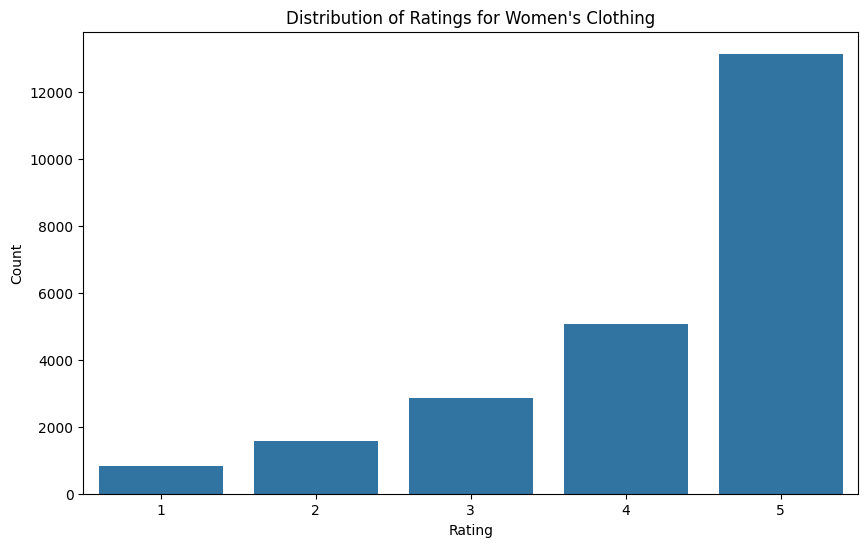

In [153]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Rating')
plt.title('Distribution of Ratings for Women\'s Clothing')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


Average Rating by Category

<ipython-input-150-1dff7def0ca4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_rating.index, y=average_rating.values, palette='coolwarm')


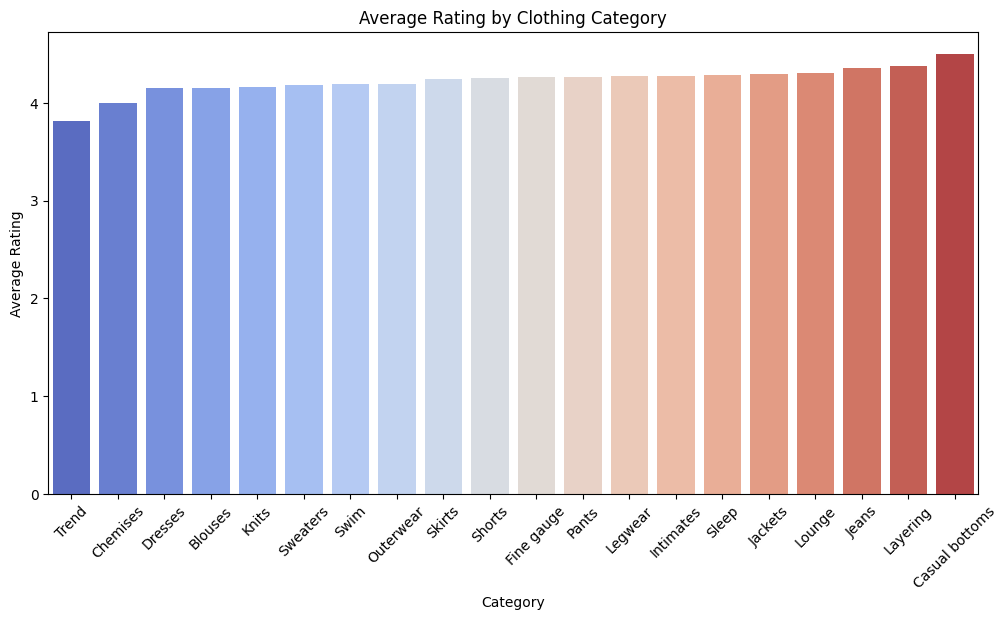

In [150]:
plt.figure(figsize=(12, 6))
average_rating = df.groupby('Category')['Rating'].mean().sort_values()
sns.barplot(x=average_rating.index, y=average_rating.values, palette='coolwarm')
plt.title('Average Rating by Clothing Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


 Relationship Between Age and Rating

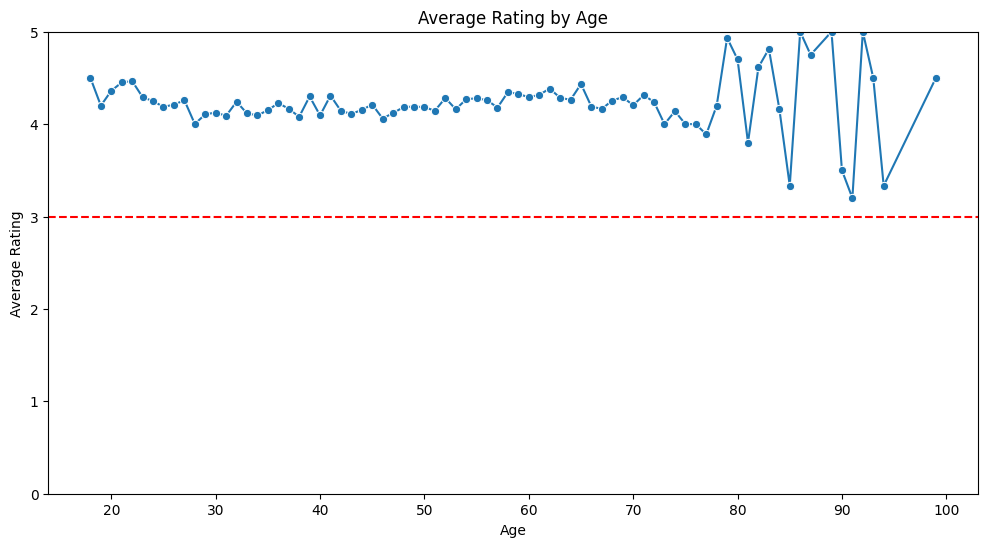

In [154]:
plt.figure(figsize=(12, 6))
age_rating = df.groupby('Age')['Rating'].mean().reset_index()
sns.lineplot(data=age_rating, x='Age', y='Rating', marker='o')
plt.title('Average Rating by Age')
plt.xlabel('Age')
plt.ylabel('Average Rating')
plt.ylim(0, 5)  # Assuming ratings are on a scale from 0 to 5
plt.axhline(y=3, color='r', linestyle='--')  # Optional: horizontal line at rating 3
plt.show()



#Data Preprocessing

#Missing Values:
Remove missing values in Reviews columns with no Review Text

In [116]:
df.isna().sum()

,0
Clothing ID,0
Age,0
Title,3810
Review,845
Rating,0
Recommended,0
Positive Feedback,0
Division,14
Department,14
Category,14


In [117]:
df[df['Review']==""]=np.NaN
df['Review'] = df['Review'].fillna("No Review")
df.isna().sum()

,0
Clothing ID,0
Age,0
Title,3810
Review,0
Rating,0
Recommended,0
Positive Feedback,0
Division,14
Department,14
Category,14


In [118]:
df['Review']

,Review
0,Absolutely wonderful - silky and sexy and comf...
1,Love this dress! it's sooo pretty. i happene...
2,I had such high hopes for this dress and reall...
3,"I love, love, love this jumpsuit. it's fun, fl..."
4,This shirt is very flattering to all due to th...
...,...
23481,I was very happy to snag this dress at such a ...
23482,"It reminds me of maternity clothes. soft, stre..."
23483,"This fit well, but the top was very see throug..."
23484,I bought this dress for a wedding i have this ...


#Define Traget (y) and Feature (x)

In [119]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review', 'Rating', 'Recommended',
       'Positive Feedback', 'Division', 'Department', 'Category'],
      dtype='object')

In [121]:
x=df['Review']
y=df['Rating']
df['Rating'].value_counts()

,count
Rating,
5,13131
4,5077
3,2871
2,1565
1,842


#Train Test Split

In [126]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,stratify=y,random_state=2529)
x_train.shape,x_test.shape,y_train.shape,y_test.shape


((16440,), (7046,), (16440,), (7046,))

#Get Feature Text Conversion to Tokens

In [127]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(lowercase=True,analyzer='word',ngram_range=(2,3),stop_words='english',max_features=5000)
x_train=cv.fit_transform(x_train)
cv.get_feature_names_out()

array(['10 12', '10 bought', '10 fit', ..., 'yellow color', 'yoga pants',
       'zipper little'], dtype=object)

In [128]:
x_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [129]:
x_test = cv.fit_transform(x_test)
cv.get_feature_names_out()

array(['10 12', '10 dress', '10 fit', ..., 'years come', 'years old',
       'yoga pants'], dtype=object)

In [130]:
x_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#Get Model Train

In [131]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

#Get Model prediction

In [134]:
y_pred = model.predict(x_test)
y_pred.shape

(7046,)

In [135]:
y_pred

array([1, 5, 5, ..., 5, 5, 5])

#Get probability of each predicted class

In [136]:
model.predict_proba(x_test)

array([[0.71118473, 0.02625165, 0.15465118, 0.01496876, 0.09294369],
       [0.02416867, 0.04769471, 0.35268622, 0.16185007, 0.41360034],
       [0.03582725, 0.06660584, 0.12226277, 0.21618005, 0.55912409],
       ...,
       [0.02320281, 0.08950939, 0.08962183, 0.16719203, 0.63047394],
       [0.01167675, 0.00202714, 0.08539004, 0.34347398, 0.55743209],
       [0.03959824, 0.05612822, 0.00688869, 0.1560574 , 0.74132745]])

#Get Model Evaluation

In [137]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))

[[  15   13   45   36  144]
 [  43   43   86   85  213]
 [ 116   78  113  166  388]
 [ 166  108  194  336  719]
 [ 371  272  349  722 2225]]


In [138]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.02      0.06      0.03       253
           2       0.08      0.09      0.09       470
           3       0.14      0.13      0.14       861
           4       0.25      0.22      0.23      1523
           5       0.60      0.56      0.58      3939

    accuracy                           0.39      7046
   macro avg       0.22      0.21      0.21      7046
weighted avg       0.42      0.39      0.40      7046



#Recategories Ratings as Poor(0) and Good(1)

In [139]:
df['Rating'].value_counts()

,count
Rating,
5,13131
4,5077
3,2871
2,1565
1,842


In [140]:
df.replace({'Rating':{1:0,2:0,3:0,4:1,5:1}},inplace=True)
y = df['Rating']
X = df['Review']

#Train Test Split

In [141]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,train_size=0.7,stratify=y,random_state=2529)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((16440,), (7046,), (16440,), (7046,))

#Get Feature Text Conversion to Tokens

In [142]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(lowercase=True,analyzer='word',ngram_range=(2,3),stop_words='english',max_features=5000)
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((16440, 5000), (7046, 5000), (16440,), (7046,))

#Get Model Re-Train

In [143]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(x_train,y_train)

MultinomialNB()

#Get Model Prediction

In [144]:
y_pred = model.predict(x_test)
y_pred.shape

(7046,)

In [145]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

#Get Model Evaluation

In [146]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))

[[ 866  717]
 [ 484 4979]]


In [147]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.64      0.55      0.59      1583
           1       0.87      0.91      0.89      5463

    accuracy                           0.83      7046
   macro avg       0.76      0.73      0.74      7046
weighted avg       0.82      0.83      0.82      7046



#Explaination
The Women Clothing Review project aims to analyze customer reviews of women's clothing to gain insights into customer satisfaction and product performance. By leveraging a dataset containing various attributes such as ratings, review texts, and customer demographics, the project seeks to identify patterns and sentiments expressed in the reviews. This information is crucial for retailers to understand what aspects of their products resonate with customers and where improvements may be needed.

To start, the project involves preprocessing the review data. This includes cleaning the text data to handle any missing values, converting the reviews into a suitable format for analysis, and extracting meaningful features using techniques like tokenization and n-grams. The `CountVectorizer` from the Scikit-learn library is employed to convert the textual data into numerical representations, allowing machine learning algorithms to process the information effectively. By transforming the reviews into a format suitable for analysis, we set the stage for deeper insights into customer sentiments.

Once the data is prepared, the project utilizes the Multinomial Naive Bayes algorithm, a popular choice for text classification tasks. The algorithm is trained on a subset of the data, allowing it to learn the relationship between the features extracted from the reviews and the corresponding ratings or sentiments. After training, the model is tested on another subset of data to evaluate its performance. Various metrics, such as accuracy and F1-score, are used to assess how well the model predicts customer sentiments based on new reviews.

Visualization plays a key role in the analysis, providing a clear understanding of the data. Graphs depicting the distribution of ratings, average ratings by clothing category, and the relationship between age and average rating help illustrate trends and patterns in customer feedback. By synthesizing insights from both the machine learning model and the visualizations, the project ultimately aims to inform retailers about customer preferences, enabling them to enhance their product offerings and improve overall customer satisfaction.